In [2]:


%matplotlib inline
import matplotlib
from matplotlib import pyplot 
import numpy #as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16



In [3]:
#Начальные данные для ур-ия Бюргерса
nx = 41  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2/(nx-1)
nt = 25    
dt = .02  
c = 1      #assume wavespeed of c = 1
x = numpy.linspace(0,2,nx)

In [4]:
u = numpy.ones(nx)      #numpy function ones()
lbound = numpy.where(x >= 0.5)
ubound = numpy.where(x <= 1)

print(lbound)
print(ubound)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], dtype=int64),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64),)


In [5]:


##problem parameters
nx = 41
dx = 2/(nx-1)
nt = 10    
dt = .02  

##initial conditions
u = -1*numpy.ones(nx)      
u[numpy.intersect1d(lbound, ubound)]=2



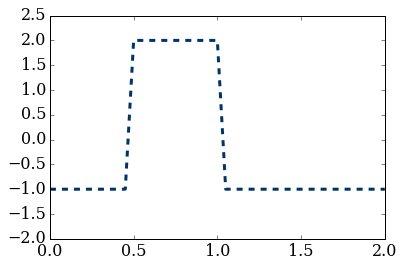

In [6]:
pyplot.plot(x, u, color='#003366', ls='--', lw=3)
pyplot.ylim(-2,2.5);

In [7]:
#Вычисление транспортных потоков 
def godunov_traff(rhol1, rhor1):
    
    rho_max = 10.
    u_max = 1.
     
    #Shock
    if rhol1<=rhor1:
        s = u_max*(1-1/rho_max*(rhor1+rhol1))
        if s>= 0:
            u = rhol1
        else:
            u = rhor1
    #Prandtl-mayer        
    else:
        if u_max*(1-2*rhol1/rho_max)>=0:
            u = rhol1
        elif u_max*(1-2*rhor1/rho_max)<=0:
            u = rhor1
        elif (1-2*rhol1/rho_max)<0<(1-2*rhor1/rho_max):
            u = 0
    return u_max*u*(1-u/rho_max)

функции задающие начальные условия


In [8]:


def rho_green_light(nx, rho_light):
    rho = numpy.arange(nx)*2./nx*rho_light  # Before stoplight
    rho[int((nx-1)/2):] = 1
    
    return rho



In [9]:
def rho_red_light(nx, rho_max, rho_in):
   
    rho = rho_max*numpy.ones(nx)
    rho[:int((nx-1)*3./4.)] = rho_in
    return rho

In [10]:
# Начальные данные для красного цвета светофора 
nx = 81
nt = 80
dx = 4.0/(nx-1)


x = numpy.linspace(0,4,nx)

rho_max = 10.
u_max = 1.
rho_light = 10.
rho_in = 5.

#rho = rho_green_light(nx, rho_light)
rho = rho_red_light(nx, rho_max, rho_in)

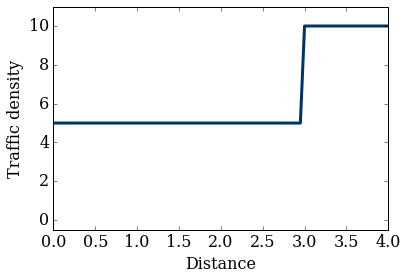

In [11]:


pyplot.plot(x, rho, color='#003366', ls='-', lw=3)
pyplot.ylabel('Traffic density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5,11.);



С красным светофором все в порядке. Метод работает. Для зеленого все не очень хорошо, при rho_max=7 и выше решение не физично. На низких максимальных плотностях все впорядке.

In [12]:
def ftbs(rho, nt, dt, dx, rho_max, u_max):
    """ Computes the solution with forward in time, backward in space
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    
    #initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho)))      
    #copy the initial u array into each row of our new array
    rho_n[0,:] = rho.copy()              
    #Fr = numpy.zeros_like(rho)
    #Fl = numpy.zeros_like(rho)
    for t in range(1,nt):
        #Fr[1:] = godunov_traff(rho[2:],rho[1:-1])
        #Fl[1:] = godunov_traff(rho[1:-1],rho[:-2])
        #Fr[0]
        #rho_n[t,1:] = rho[1:] - dt/dx*(F[1:]-F[:-1])
        for i in range(1,len(rho)-1):
           
            rho_n[t,i] = rho[i]-dt/dx*(godunov_traff(rho[i],rho[i+1])-godunov_traff(rho[i-1],rho[i]))
            
        rho_n[t,0] = rho[0]
        rho = rho_n[t].copy()

    return rho_n

In [13]:


sigma = 1.
dt = sigma*dx

rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)



In [15]:


from matplotlib import animation
from IPython.display import HTML



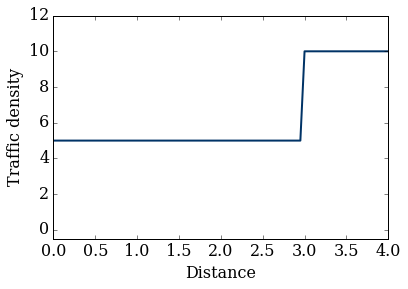

In [16]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-.5,12),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)

In [17]:
HTML(anim.to_html5_video())

RuntimeError: No MovieWriters available!